卡尔曼滤波作为一种面向线性系统的最优估计算法，最初应用于控制领域，其根据系统输入及输出观测数据，对系统状态进行最优估算。由于观测数据中含有系统噪声等影响，所以最优估算过程也可看做滤波过程。卡尔曼滤波是一种以最小二乘法为基础来估计系统状态的方法，即将前一时刻的预报误差反馈到当前时刻的预报方程中，及时修正预报方程系数，以提高下一时刻的预报精度。由于人体关节的运动是连续的，而对视频进行特征点检测得到的特征点坐标波动幅度较大，轨迹不够平滑，因此可以采用卡尔曼滤算法将前一段时间的人体姿态反馈到当前时刻去估计当前帧的人体姿态，从而达到使运动序列平整化的目的。  
在卡尔曼滤波修正过程中，需确定系统的状态方程和量测方程$$x_t=F_tx_{t-1}+Bu_{t-1}+w_t$$  
$$y_t=H_tx_t+v_t$$
上式中，$x_t$表示t时刻的状态向量，$y_t$表示t时刻的观测向量，$F_t$表示系统矩阵，$H_t$表示观测矩阵，$w_t$和$v_t$表示系统噪声和量测噪声,服从均值为0，方差分别为$Q$和$R$的高斯分布，即$w_t\sim N(0,Q),v_t\sim N(0,R)$。  
对于基于卡尔曼滤波算法对人体姿态的修正，本文提出了两种方法：  
一、基于三维刚体变换的卡尔曼滤波  
可以将人体主干脖子-左髋-右髋认为是一个刚体，刚体在三维空间中具有三维旋转平移不变性，刚体变换有对应的六个参数:$\phi,\theta,\psi,t_x,t_y,t_z$，分别对应三个方向的欧拉角和三个方向的位移  
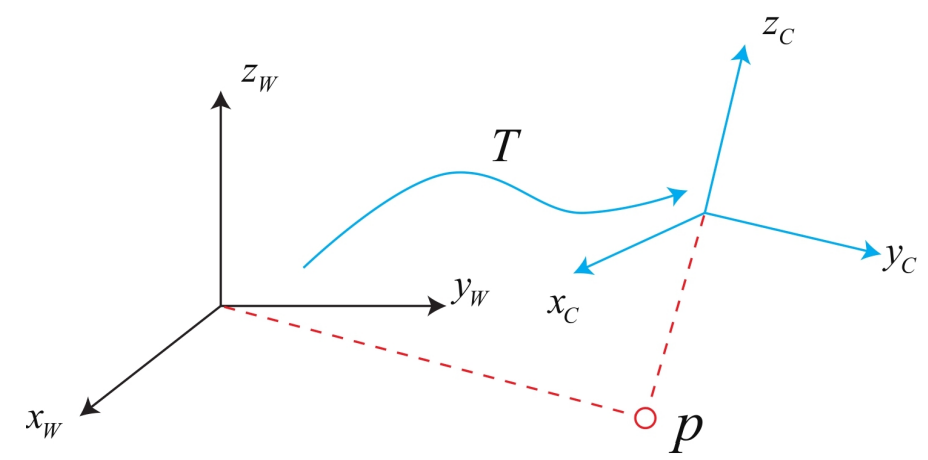  
(随便找的图，待会改)  
一个三维关节点$A$的坐标$\boldsymbol{a}=(a_x,a_y,a_z)$刚体变换后得到点$A^{\prime}$坐标$\boldsymbol{a^{\prime}}=(a_x^{\prime},a_y^{\prime},a_z^{\prime})$。将三维向量写成齐次坐标的形式，三维刚体变换可表示为:  
$$\left[
\begin{array}{l}
\boldsymbol{a^{\prime}}\\
1
\end{array}
\right]
=
\left[
\begin{array}{l}
\boldsymbol{R}_{3\times 3}&\boldsymbol{T}_{3\times 1}\\
\boldsymbol{0}_{1\times 3}&1
\end{array}
\right]
\left[
\begin{array}{l}
\boldsymbol{a}\\
1
\end{array}
\right]
$$
其中$\boldsymbol{T_{3\times 1}}=(t_x,t_y,t_z)^T$为三维位移向量，$R_{3\times 3}$是由$\phi,\theta,\psi$构成的三维旋转矩阵$$\boldsymbol{R_{3\times 3}}=
\left[
\begin{array}{l}
r_1&r_2&r_3\\
r_4&r_5&r_6\\
r_7&r_8&r_9\\
\end{array}
\right]$$
则三维刚体变换过程中的每一个关节点t时刻的状态向量$x_t$即为$\boldsymbol{a}$，第$k$帧目标状态方程为$$x_k=\boldsymbol{R_k}(\boldsymbol{I}+\beta(k-1))x_{k-1}+T_k+\Delta(k-1)$$  
其中,$R_k$为旋转矩阵，$T_k$为位移向量，$\beta(k-1),\Delta(k-1)$分别为旋转和平移噪声  
二、直接对每一维坐标进行卡尔曼滤波  
以对$x$坐标进行卡尔曼滤波为例，$u_t$表示现在状态的控制量，由于该过程中没有对$x$坐标的控制量，所以$u_t$恒为0，令状态转移矩阵$F$为单位阵，这样处理与方法一相比可以简化计算量，计算更快速且编程更为容易，因此本文采取方法二建模，此时状态方程可以简化为$$x_t=x_{t-1}+w_t$$  
卡尔曼滤波的具体计算步骤如下:  
(1)根据上一状态值对预测现在的状态:
$$x(k|k-1)=x(k-1|k-1)$$
上式中，$x(k-1|k-1)$是上一时刻的最优解，$x(k|k-1)$是利用上一状态预测的结果。  
(2)更新协方差
$$P(k|k-1)=FP(k-1|k-1)F^T+Q$$
此处$P(k|k-1)$是$x(k|k-1)$对应的协方差，$P(k-1|k-1)$是$x(k-1|k-1)$对应的协方差，$Q$为过程噪声。由于这里是一维数据，$F$为1，所以可简化为
$$P(k|k-1)=P(k-1|k-1)+Q$$
(3)计算当前的卡尔曼增益
$$K(k)=\frac{P(k|k-1)H^T}{HP(k|k-1)H^T+R}=\frac{P(k-1|k-1)+Q}{P(k-1|k-1)+Q+R}$$
上式中$K(k)$为$k$时刻的卡尔曼增益，推导见参考文献(敬喜.卡尔曼滤波器及其应用基础［M］.北京：国防工业出 版 社，
1973.)$R$为量测噪声的方差，由于是一维数据，因此$H^T=1$  
(4)修正估计值，得出最优解  
$$x(k|k)=x(k|k-1)+K(k)(x_k-x(k|k-1))$$
上式中$x(k|k)$为当前修正值，得到当前的最优解，$x_k$为第$k$帧还原出的人体3维坐标中的$x$坐标，$K(k)$为第(3)步计算出的卡尔曼增益  
(5)计算最优解所对应的协方差  
$$P(k|k)=(1-K(k)H)P(k|k-1)=R\times \frac{P(k-1|k-1)+Q}{P(k-1|k-1)+R+Q}$$

低通滤波  
采用一阶低通滤波再对经过卡尔曼滤波处理后的结果进行优化，以$x$方向的坐标为例，公式为
$$x_k=\alpha\times x_{k-1}+(1-\alpha)\times x_{k-2}$$
上式中$\alpha$为低通滤波的系数，$x_k$为第$k$帧中该关节点的$x$坐标。本文选取待优化帧的前6帧联合起来为当前帧进行低通滤波，算法如下：


```PrevPose3D[0] = smooth_kps
    for j in range(1,6):
        PrevPose3D[j] = PrevPose3D[j] * LowPassParam + PrevPose3D[j - 1] * (1.0 - LowPassParam)
    datafinal[idx] = PrevPose3D[5] # record kalman+low pass result.
    